In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

## 1.) Is the distribution of body temperatures normal?

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)
SkewtestResult(statistic=-0.021370491432771, pvalue=0.9829501126135382)


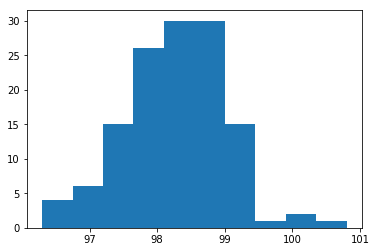

In [2]:
# Your work here.
plt.hist(df['temperature'])
print(scipy.stats.normaltest(df.temperature))
# p value greater than alpha=.05, cannot reject null hypothesis that data is normally distributed
print(scipy.stats.skewtest(df.temperature))

## 2.)Is the sample size large? Are the observations independent?

In [3]:
len(df.temperature)

130

n=130 seems big enough for central limit theorem to apply.  Of course this is a small sample compared to number of all humans. This would need more background info on how the dataset was acquired to determine if each temperature is truly independent, but that seems to be the case in this context.


## 3.) Is the true population mean really 98.6 degrees F?

In [5]:
# bootstrap hypothesis test:
temps = np.array(df.temperature)
shifted_temps = temps - np.mean(temps) + 98.6
bs_replicates = np.empty(10000)
for i in range(10000):
        bs_replicates[i] = np.mean(np.random.choice(shifted_temps, size=len(shifted_temps)))

p = np.sum(bs_replicates <= np.mean(temps))/10000
print('p = ', p)
# p-value of zero suggest the null hypothesis is false and should be rejected.
# 'frequentist' tests:
# No need to use a two sample test.
# Since n is greater than 30 we should use z-score but because the population standard deviation is unknown
# I have to estimate it with the sample standard deviation so arguably either test could be used.
Z = (np.mean(temps)-98.6)/(np.std(temps)/np.sqrt(len(temps)))
print(Z)
scipy.stats.ttest_1samp(temps,98.6)
# both tests indicate that there is an extremely low probability that this sample was drawn from a population with a mean of 
# 98.6 and the null should be rejected.  The slight differences are because the two statistics use different distributions.

p =  0.0
-5.4759252020785585


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## 4.) Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [6]:
sample = np.random.choice(temps,size=10,replace=False)
Z = (np.mean(sample)-98.6)/(np.std(sample)/np.sqrt(len(sample)))
print(Z)
scipy.stats.ttest_1samp(sample,98.6)

-1.8830065177034454


Ttest_1sampResult(statistic=-1.7863768334655177, pvalue=0.10768595707413557)

The t-test is the right one to use because n<30.
There is now a greater difference between the t and Z statistics. This t-test now gives less than 99% confidence for the rejection of the null hypothesis. The t test and Z test converge as the sample size increases.

## 5.) At what temperature should we consider someone's temperature to be "abnormal"?

In [7]:
# 99.7% confidence interval in a normal distribution
standarderror=np.std(temps)/np.sqrt(len(temps)) #standard error
marginoferror=1.96*standarderror
print('margin of error',marginoferror)
# bootstrap approach for calculating abnormal temperatures, taking the standard deviations of 10,000 simulated samples
bs_replicates = np.empty(10000)
for i in range(10000):
        bs_replicates[i] = np.std(np.random.choice(temps, size=len(temps)))
abnormal_low = np.mean(temps) - 1.96*np.mean(bs_replicates)
abnormal_high = np.mean(temps) + 1.96*np.mean(bs_replicates)
print('abnormally low',abnormal_low,'abnormally high',abnormal_high)
# frequentist approach
abnormal_low = np.mean(temps) - marginoferror
abnormal_high = np.mean(temps) + marginoferror
print('abnormally low',abnormal_low,'abnormally high',abnormal_high)

margin of error 0.12555096480257902
abnormally low 96.82598237455335 abnormally high 99.67247916390815
abnormally low 98.12367980442816 abnormally high 98.37478173403333


## 6.) Is there a significant difference between males and females in normal temperature?

In [8]:
males= df.loc[df['gender']=='M']
females= df.loc[df['gender']=='F']
male_temps = np.array(males.temperature)
female_temps = np.array(females.temperature)
mu1 = np.mean(male_temps)
mu2 = np.mean(female_temps)
diff = mu2-mu1
n1 = len(male_temps)
n2 = len(female_temps)
std1 = np.std(male_temps)
std2 = np.std(female_temps)
print('male mean',mu1)
print('female mean',mu2)
print('observed differed',diff)
criticalZ = 1.96

male mean 98.10461538461537
female mean 98.39384615384614
observed differed 0.2892307692307696


I will use a null hypothesis so that there is no difference bewteen the mean temperature of males and females.
i.e. mu1 - mu2 = 0.  For alpha of .05 (or 95% confidence) the critical z value for a normalized standard distribution is approximately 1.96. 
I will calculate the standard deviation of the distribution of the difference in means and multiply it by the critical z score to obtain the critical difference of means for 95% confidence.

In [9]:
diffofmeanstd = np.sqrt((std1**2/n1)+(std2**2/n2))
criticaldiffofmeans = diffofmeanstd*criticalZ
print('critical difference',criticaldiffofmeans)
p_value = (1-scipy.stats.norm.cdf(diff/diffofmeanstd))*2
print('p value',p_value)

critical difference 0.24613030301613179
p value 0.021266451830110222


The critical difference in means is ~ 0.243 which is less than the observed difference. Reject the null hypothesis here. This means there is 5% chance of getting a difference greater in magnitude than 0.243 if the null is true.
It should be noted it still plausible that the null is true. This suggests women have a higher average body temperature than men.